<a href="https://colab.research.google.com/github/gitevaishnavi/gitevaishnavi/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Iris Flower Classification

# <img src="https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png">
from IPython.display import Image
Image(url="https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png")

### Context

The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

### Project Objective

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.



**Dataset** **Information**

The data set contains 3 classes of instances each, where each class refers to a type of iris plant. one class is linearly separable from the other 2; the latter are not linearly

**Attribute** **Information**:

      sepal length in cm
      sepal width in cm
      petal length in cm
      petal width in cm
      class:
     
      -- Iris Setosa -- Iris Versicolour -- Iris Virginica
    




In [ ]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Try to find the correct path to your file
# If you're on Kaggle, the path likely starts with '../input/'
# and you should list the folders to get to your file from there
# If you're running locally, you need to provide the local path
# replace 'correct/path/to/your/file.csv' with your actual file location
iris = pd.read_csv('/content/Iris.csv')

# If the above doesn't work, print the current directory
# and explore where the file could be
import os
print(os.getcwd())

/content


In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Assuming the column name is actually 'Species' (Capital 'S')
iris.groupby('Species').mean()

# Alternatively, check the actual column names and use the correct one
print(iris.columns)  # Print the column names to verify
iris.groupby(iris.columns[5]).mean() # Assuming species column is at index 5

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


## Data Visualization

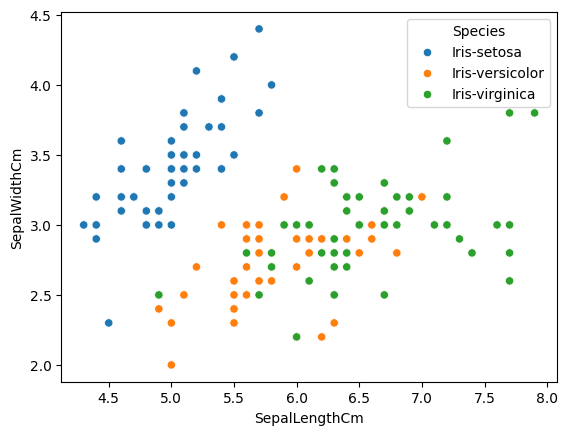

In [ ]:
# Assuming your column name is 'SepalLengthCm', correct it in the scatterplot function:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris)
plt.show()

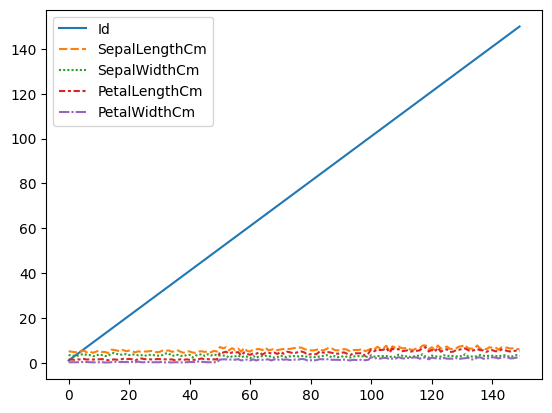

In [ ]:
sns.lineplot(data=iris.drop(['Species'], axis=1))
plt.show()

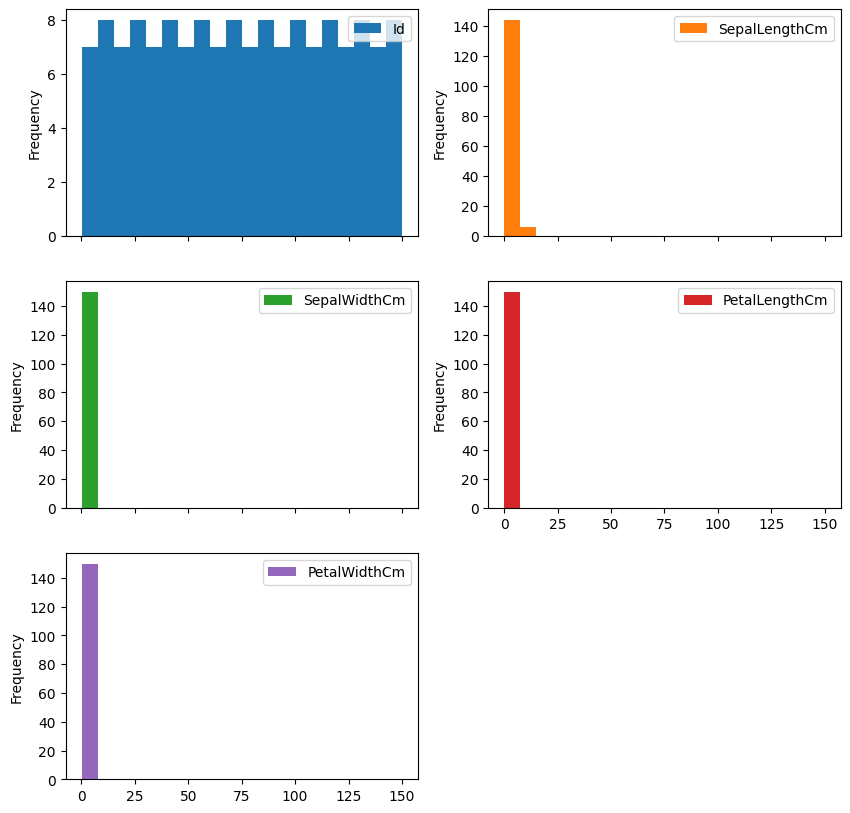

In [ ]:
# Change the layout to accommodate all columns. For example, a 3x2 layout:
iris.plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)
plt.show()

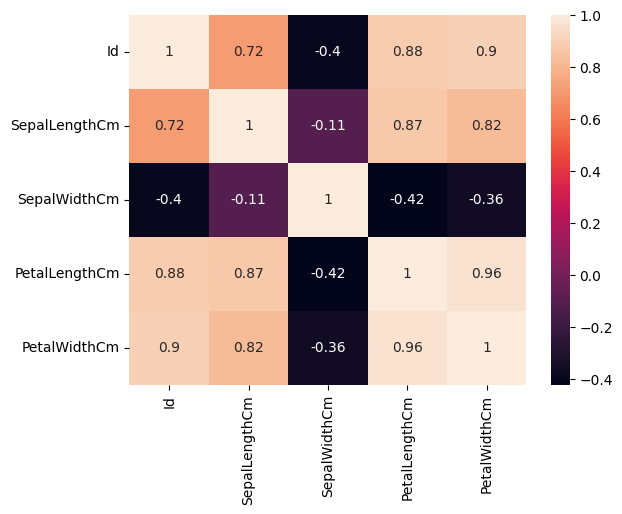

In [ ]:
# Select only numerical features for correlation calculation
numerical_features = iris.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True)
plt.show()

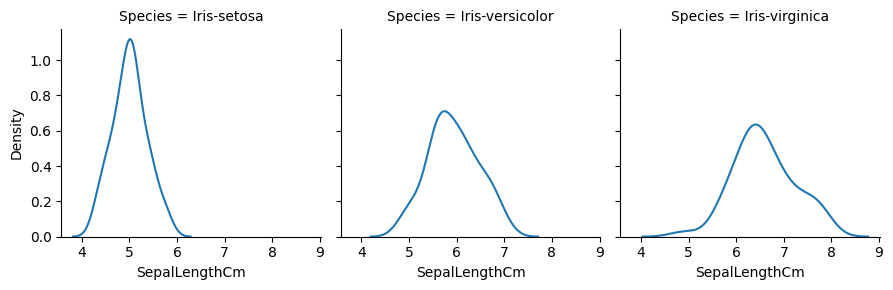

In [ ]:
g = sns.FacetGrid(iris, col='Species')
g = g.map(sns.kdeplot, 'SepalLengthCm') # Change 'sepal_length' to 'SepalLengthCm'

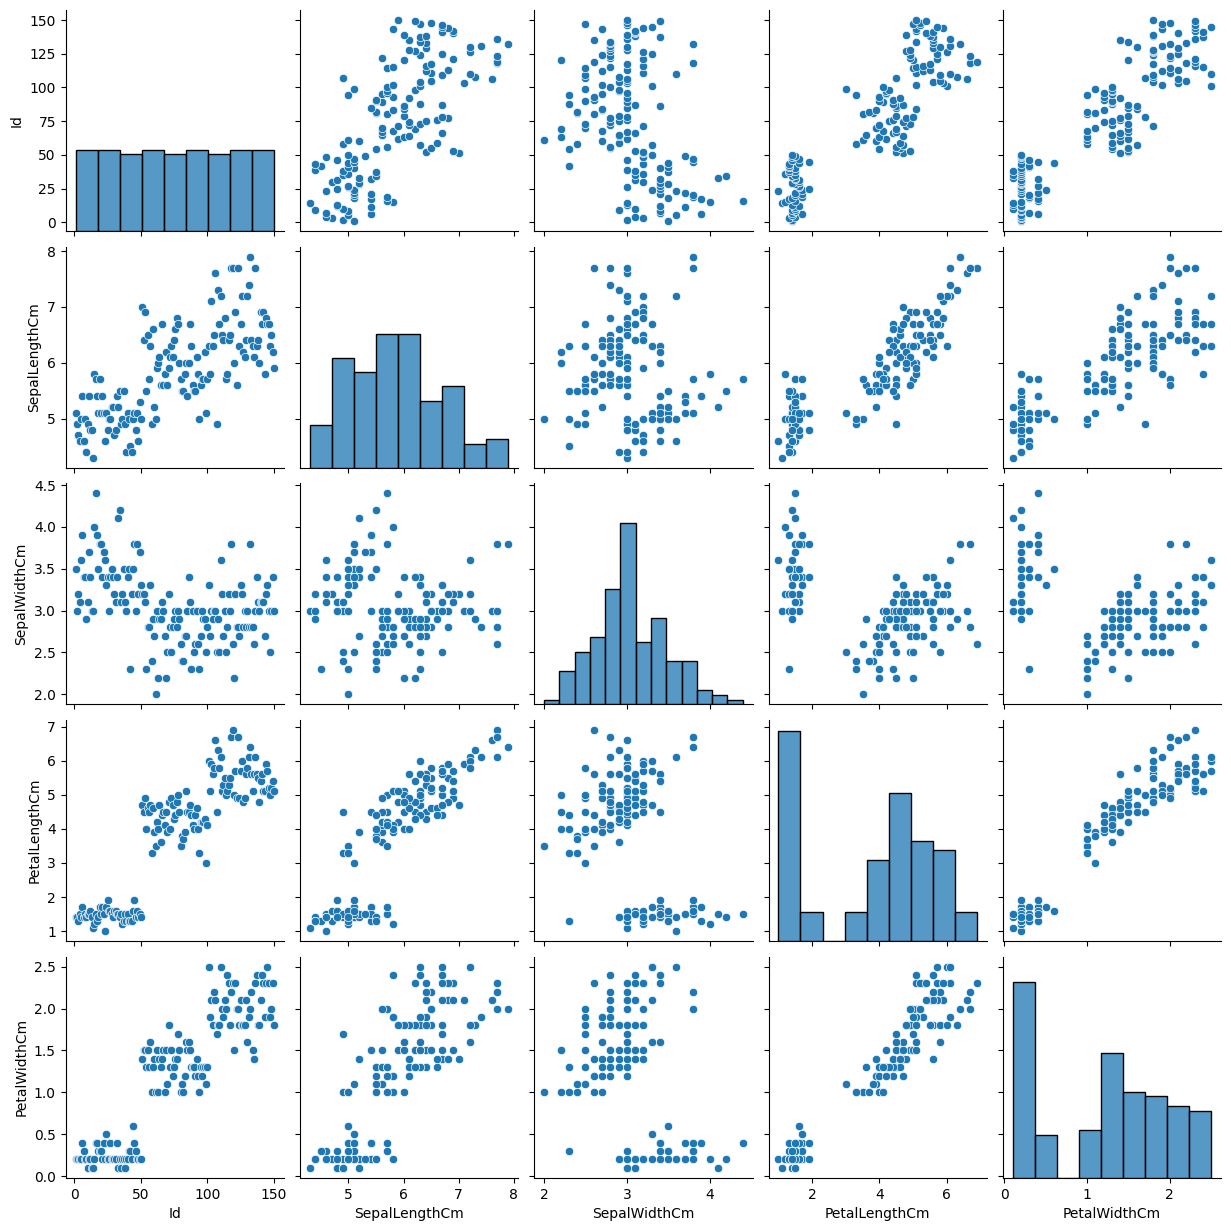

In [ ]:
sns.pairplot(iris)

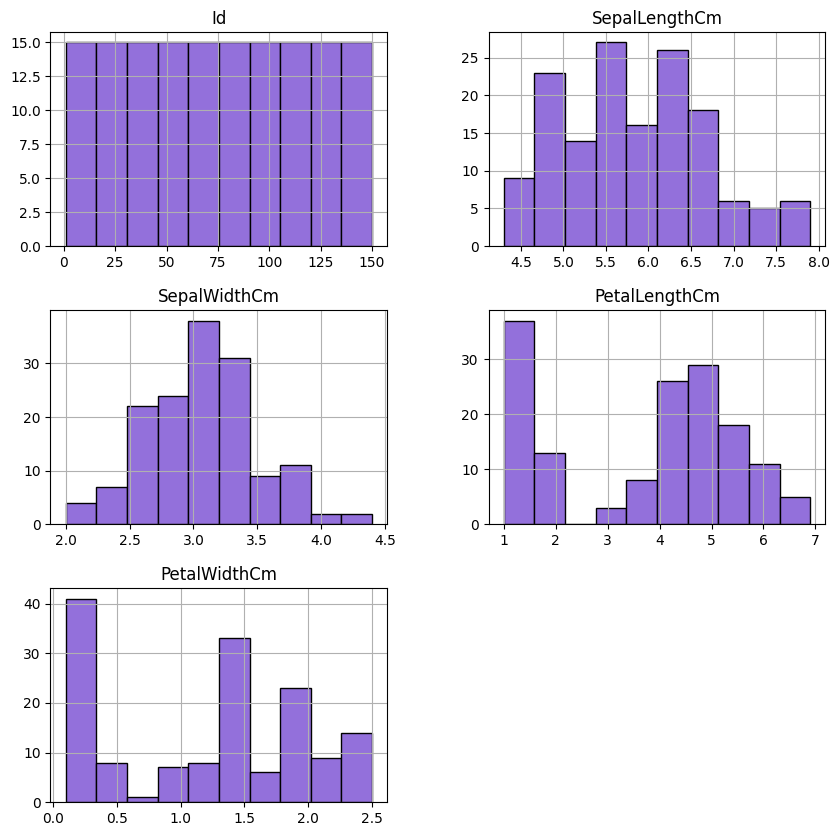

In [ ]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [ ]:
numerical_features = iris.select_dtypes(include=np.number)
numerical_features.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.00,0.72,-0.40,0.88,0.90
SepalLengthCm,0.72,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.40,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.88,0.87,-0.42,1.00,0.96
PetalWidthCm,0.90,0.82,-0.36,0.96,1.00


## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
x = iris.drop('Species', axis=1)
y= iris.Species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

### <font color="blue"><b>K Neighbors Classifier</b></font>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

1.0

### <font color="blue"><b>Logistic Regression</b></font>

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

1.0


### <font color="blue"><b>SVM</b></font>

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

1.0

### <font color="blue"><b>Decision Tree Classifier</b></font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

1.0